## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la computacion
## Carrera: Ingenieria en Computacion Inteligente
## Curso: Machine  y Deep Learning
## Maestro: Dr. Francisco Javier Luna Rosas
## Alumno: Guillermo González Lara (237864)
 Semestre: Enero_Junio del 2026

## Practica 8: Redes neuronales (Formas de Entrenamiento)


### 1). Modelo de Entrenamiento Basado en Tabla de Aprendizaje y Tabla Testing

Este es el enfoque conocido como the validation test approach. Según la documentación proporcionada:

Un modelo de entrenamiento y prueba basado en una tabla de datos es un enfoque utilizado en aprendizaje automático donde los datos de entrada están organizados en forma de tabla, como en bases de datos o archivos CSV. Para evaluar correctamente el modelo, se dividen los datos en dos partes:

- Entrenamiento (Train): 70-80% de los datos, usados para que el modelo aprenda.

- Prueba (Test): 20-30% de los datos, usados para evaluar el rendimiento del modelo.

### Paso 1: Importar las librerías necesarias

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Paso 2: cargamos el dataset

In [5]:
os.chdir("C:/Users/Laremo/Documents/git/MDL-2026/Practica 5/")
datos = pd.read_csv('iris.csv', delimiter=';', decimal=".")

print(datos.shape)
print(datos.head())

(150, 5)
   s.largo  s.ancho  p.largo  p.ancho    tipo
0      5.1      3.5      1.4      0.2  setosa
1      4.9      3.0      1.4      0.2  setosa
2      4.7      3.2      1.3      0.2  setosa
3      4.6      3.1      1.5      0.2  setosa
4      5.0      3.6      1.4      0.2  setosa


### Paso 3: Elimina la variable categórica, deja las variables predictoras en X

In [6]:
X = datos.iloc[:, :4]
print(X.head())

   s.largo  s.ancho  p.largo  p.ancho
0      5.1      3.5      1.4      0.2
1      4.9      3.0      1.4      0.2
2      4.7      3.2      1.3      0.2
3      4.6      3.1      1.5      0.2
4      5.0      3.6      1.4      0.2


### Paso 4: Deja la variable a predecir en y

In [7]:
y = datos.iloc[:,4:5]
print(y.head())

     tipo
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


### Paso 5: Enfoque Training-Testing para medir el error

c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

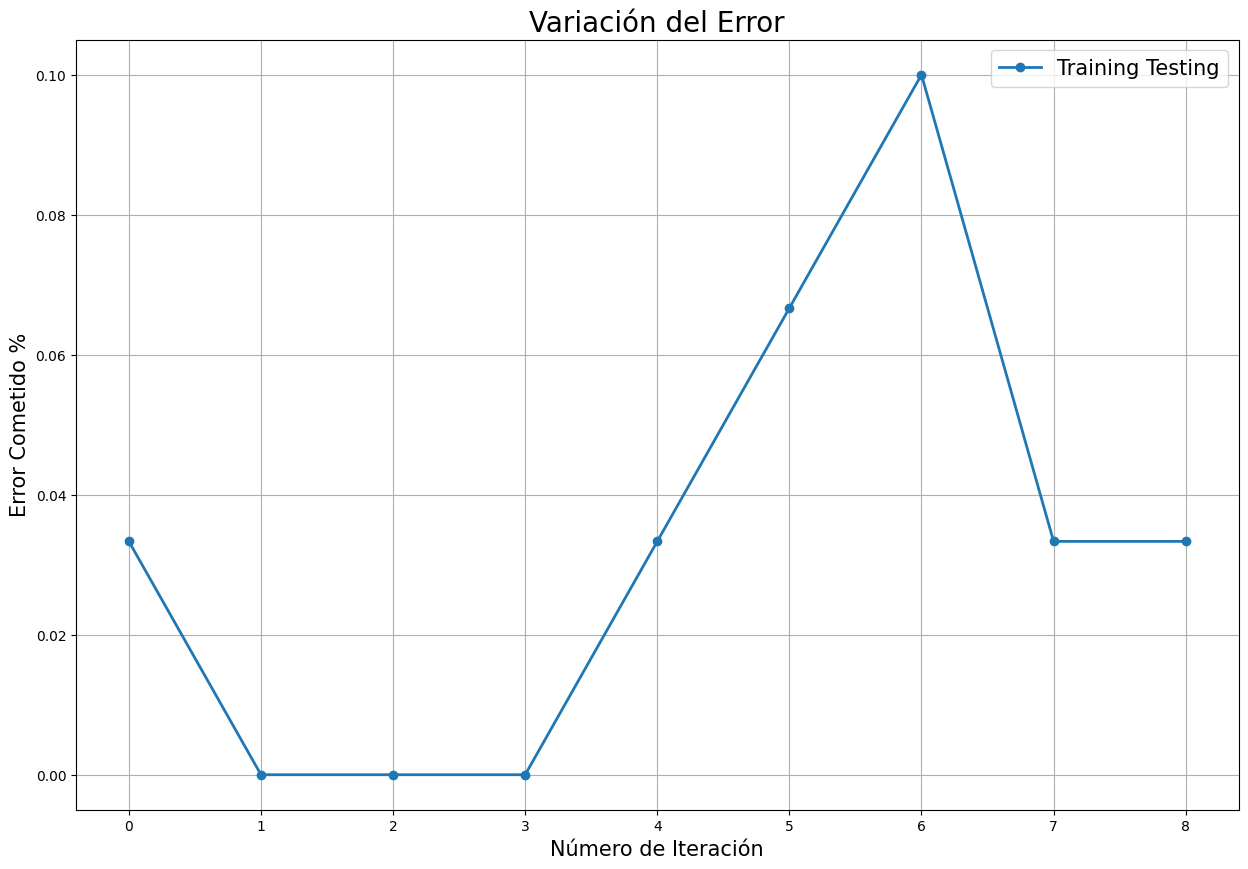

In [8]:
error_tt = []

for i in range(0, 9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

    instancia_red = MLPClassifier()
    instancia_red.fit(X_train,y_train.iloc[:,0].values)
    error_tt.append(1 - instancia_red.score(X_test, y_test))

plt.figure(figsize=(15,10))
plt.plot(error_tt, 'o-', lw = 2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing'], loc = 'upper right', fontsize = 15)

### Paso 6: